In [1]:
# 计算分类概率

import numpy as np

#计算第一个数据属于类别2的概率
np.exp(0.3*1+0.2*2)/(np.exp(0.2*1+0.4*2)+np.exp(0.3*1+0.2*2)+np.exp(0.5*1+0.1*2))

0.29852004440856167

In [2]:
#使用矩阵

X=np.array([[1,2],[.3,.4],[.5,.6]])
W=np.array([[.2,.3,.5],[.4,.2,.1]])
Z = X.dot(W)
Z

array([[1.  , 0.7 , 0.7 ],
       [0.22, 0.17, 0.19],
       [0.34, 0.27, 0.31]])

In [5]:
np.exp(Z)

array([[2.71828183, 2.01375271, 2.01375271],
       [1.24607673, 1.18530485, 1.2092496 ],
       [1.40494759, 1.30996445, 1.36342511]])

In [7]:
np.sum(np.exp(Z), axis=1)

array([6.74578724, 3.64063118, 4.07833716])

In [8]:
np.sum(np.exp(Z), axis=1).reshape(-1,1)

array([[6.74578724],
       [3.64063118],
       [4.07833716]])

In [9]:
np.exp(Z)/np.sum(np.exp(Z), axis=1).reshape(-1,1)

array([[0.40295991, 0.29852004, 0.29852004],
       [0.34226942, 0.32557675, 0.33215383],
       [0.3444903 , 0.32120063, 0.33430907]])

In [11]:
#矩阵的作用在于一次性把结果都计算出来
def prob(X, W):
    Z = X.dot(W)
    return np.exp(Z)/np.sum(np.exp(Z), axis=1).reshape(-1,1)

prob(X,W)

array([[0.40295991, 0.29852004, 0.29852004],
       [0.34226942, 0.32557675, 0.33215383],
       [0.3444903 , 0.32120063, 0.33430907]])

# 实践案例1——鸢尾花种类识别

In [42]:
# 准备数据
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
# 拆分数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 训练模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# 评估模型
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("训练集的混淆矩阵：\n ", confusion_matrix(y_train, y_train_pred))
print("测试集的混淆矩阵: \n", confusion_matrix(y_test, y_test_pred))

训练集的混淆矩阵：
  [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
测试集的混淆矩阵: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [33]:
accu= accuracy_score(y_test_pred, y_test)
print(f"accuracy score: {accu:.3f}", )

accuracy score: 0.978


In [34]:
X[100]

array([5.1, 3.5, 1.4, 0.2])

In [37]:
lr.predict([X[100]])

array([2])

In [38]:
lr.predict_proba([X[100]])

array([[2.47776314e-06, 6.75627217e-03, 9.93241250e-01]])

# 实践案例2-手写字体识别

In [4]:
# 导入数据
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y=True)
y

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
X[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

In [19]:
X.shape

(1797, 64)

In [20]:
X[100].reshape(8,8)

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

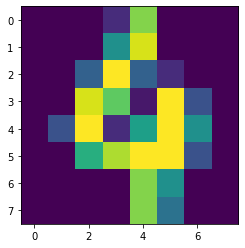

In [7]:
#显示数据信息
import matplotlib.pyplot as plt
img = X[100].reshape(8,8)
plt.imshow(img, interpolation="nearest")
plt.show()

In [9]:
y[100]

4

In [14]:
# 拆分数据
from sklearn.model_selection import train_test_split
X,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 训练模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

#评估模型
## 结果预测
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

##  混淆矩阵
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix for training set: \n", confusion_matrix(y_train, y_train_pred))
print("confusion matrix for test set: \n", confusion_matrix(y_test, y_test_pred))

##预测精度
print(f"accuracy for training set: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"accuracy for test set: {accuracy_score(y_test, y_test_pred)}")


confusion matrix for training set: 
 [[133   0   0   0   0   0   0   0   0   0]
 [  0 130   0   0   0   0   0   0   0   0]
 [  0   0 124   0   0   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   0   0]
 [  0   0   0   0 133   0   0   0   0   0]
 [  0   0   0   0   0 125   0   0   0   0]
 [  0   0   0   0   0   0 121   0   0   0]
 [  0   0   0   0   0   0   0 126   0   0]
 [  0   0   0   0   0   0   0   0 113   0]
 [  0   0   0   0   0   0   0   0   0 123]]
confusion matrix for test set: 
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  1]
 [ 0  2 49  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  0  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  1  0  0 51  0  0]
 [ 0  3  1  0  0  0  0  0 53  4]
 [ 0  0  0  0  0  1  0  0  1 55]]
accuracy for training set: 1.000
accuracy for test set: 0.9537037037037037


C:\Users\Danny\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#针对训练集，准确率100%； 针对测试集，准确率高达95.4%

In [98]:
# 撰写自己的多分类回归程序
from sklearn.datasets import load_iris
X,y0 = load_iris(return_X_y=True)
n_features = X.shape[1]
import pandas as pd
y=pd.get_dummies(y0).values
y_categories = y.shape[1]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [121]:
# 设置初始参数
import numpy as np
beta0 = np.ones((n_features, y_categories))/y_categories
beta0

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [117]:
def prob(beta):
    n_obs =X.shape[0]
    p = np.exp(X.dot(beta))/(np.sum(np.exp(X.dot(beta)), axis=1)).reshape(n_obs,1)
    return p


def loss(beta):
    n_obs =X.shape[0]
    return -np.sum(y.T.dot(np.log(prob(beta))))/n_obs

def grad(beta):
    p=prob(beta)
    return X.T.dot(p-y)/n_obs

grad(beta0)    

array([[ 4.1744923 , -1.97857948, -2.19591282],
       [ 1.91455165, -0.92327583, -0.99127583],
       [ 3.27061354, -1.41997344, -1.8506401 ],
       [ 1.11732443, -0.44199555, -0.67532888]])

In [118]:
beta0 = np.zeros((n_features, y_categories))
beta0[:,0]=1.0
beta = beta0
l = loss(beta)
g = grad(beta)

ls=[]
alpha= 0.01
for i in range(30):
    print(f"loss = {l:.3f}, beta={beta}, grad= {g}")
    ls.append(l)
    beta = beta - alpha * g
    l = loss(beta)    
    g = grad(beta)

loss = 27.716, beta=[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]], grad= [[ 4.1744923  -1.97857948 -2.19591282]
 [ 1.91455165 -0.92327583 -0.99127583]
 [ 3.27061354 -1.41997344 -1.8506401 ]
 [ 1.11732443 -0.44199555 -0.67532888]]
loss = 26.400, beta=[[0.95825508 0.01978579 0.02195913]
 [0.98085448 0.00923276 0.00991276]
 [0.96729386 0.01419973 0.0185064 ]
 [0.98882676 0.00441996 0.00675329]], grad= [[ 4.17438774 -1.97852857 -2.19585916]
 [ 1.91448282 -0.92324231 -0.99124051]
 [ 3.27058104 -1.41995762 -1.85062341]
 [ 1.11731881 -0.44199282 -0.675326  ]]
loss = 25.084, beta=[[0.9165112  0.03957108 0.04391772]
 [0.96170966 0.01846518 0.01982516]
 [0.93458805 0.02839931 0.03701264]
 [0.97765357 0.00883988 0.01350655]], grad= [[ 4.1742195  -1.97844751 -2.19577199]
 [ 1.91437223 -0.92318901 -0.99118322]
 [ 3.27052818 -1.41993218 -1.85059599]
 [ 1.11730953 -0.44198836 -0.67532117]]
loss = 23.768, beta=[[0.874769   0.05935556 0.06587544]
 [0.94256593 0.02769707 0.029737  ]
 [0.90188277 0.04

In [104]:
prob(beta)

array([[0.66209705, 0.22016054, 0.11774241],
       [0.56980701, 0.27395769, 0.1562353 ],
       [0.6332547 , 0.23426018, 0.13248512],
       [0.58392497, 0.25986615, 0.15620888],
       [0.6837451 , 0.20563499, 0.11061991],
       [0.69641294, 0.19590393, 0.10768313],
       [0.66697991, 0.20985404, 0.12316606],
       [0.63056193, 0.23725351, 0.13218455],
       [0.56644343, 0.26857568, 0.1649809 ],
       [0.56513181, 0.27754948, 0.15731871],
       [0.6745911 , 0.21459408, 0.11081482],
       [0.6211639 , 0.23919005, 0.13964605],
       [0.56480228, 0.27767901, 0.15751871],
       [0.63119572, 0.23475245, 0.13405183],
       [0.7549145 , 0.168947  , 0.0761385 ],
       [0.79292748, 0.13910335, 0.06796917],
       [0.75083179, 0.1653091 , 0.08385911],
       [0.66984404, 0.21370952, 0.11644645],
       [0.6611084 , 0.22263082, 0.11626079],
       [0.70913595, 0.18843881, 0.10242524],
       [0.58434066, 0.26820644, 0.1474529 ],
       [0.69886473, 0.19328787, 0.1078474 ],
       [0.

In [105]:
loss(beta0)

27.710905405431927

In [112]:
loss(beta)

3.341702880327184

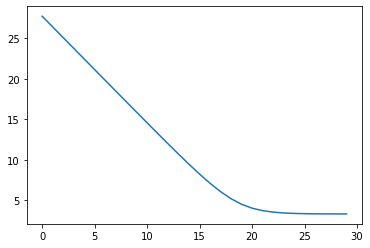

In [119]:
plt.plot(ls)

In [120]:
y_pred = np.argmax(prob(beta), axis=1)
y_pred

array([1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2], dtype=int32)

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y0)

array([[16,  0,  6],
       [10,  0,  0],
       [24, 50, 44]], dtype=int64)

In [116]:
accu = np.sum(y_pred==y0)/n_obs
print(f"accuracy = {accu}")

accuracy = 0.4


In [262]:
class LGR(object):
    def __init__(self, alpha=0.1):
        self.alpha=alpha
        self.beta=None 
        self.X=None
        self.y=None
        self.ls= []
    

    def get_ymatrix(self,y):
        import pandas as pd
        # print(y.shape)
        ymatrix=pd.get_dummies(y).values
        return ymatrix
    
    def prob(self, X, beta):  
        n_obs = X.shape[0]
        sum_exp= (np.sum(np.exp(X.dot(beta)), axis=1)) # shape= (n_obs, )
        sum_exp = sum_exp.reshape(n_obs,1) # shape = (n_obs, 1)
        prob = np.exp(X.dot(beta))/sum_exp
        return prob
    
    def __prob(self, beta):
        return self.prob(self.X,beta)

    def loss(self, X, y, beta):
        n_obs = X.shape[0]
        p=self.prob(X, beta) 
        ymatrix=self.get_ymatrix(y)
        l= -np.sum(ymatrix.T.dot(np.log(p)))/n_obs
        return l

    def grad(self, X, y, beta):
        n_obs = X.shape[0]
        p=self.prob(X,beta)
        ymatrix = self.get_ymatrix(y)
        return X.T.dot(p-ymatrix)/n_obs

    def fit(self, X,y):
        self.X = X
        self.y = y
        ymatrix = self.get_ymatrix(y)
        self.ymatrix = ymatrix
        K=ymatrix.shape[1]  #分类数
        n_features = X.shape[1]
        # print((n_features,K))
        print(f"n_features:{n_features}")
        print(f"K={K}")
        beta0 = np.ones((n_features, K))     
        beta = beta0
        self.beta = beta
        l = self.loss(X, y, beta)
        g = self.grad(X, y, beta)       

        for i in range(30):
            # print(f"loss = {l:.3f}, beta={beta}, grad= {g}")
            self.ls.append(l)
            self.beta = beta
            beta = beta - self.alpha * g
            print(f"beta:{beta}")

            l = self.loss(X, y, beta)    
            g = self.grad(X, y, beta)

    def predict_prob(self,X):
        return self.prob(X, self.beta)
    
    def predict(self,X):
        p = self.prob(X, self.beta)
        y_pred = np.argmax(p, axis=1)
        return y_pred

n_features:2
K=3
beta:[[1.05555556 0.95555556 0.98888889]
 [1.03333333 1.         0.96666667]]
beta:[[1.09115152 0.92187369 0.98697479]
 [1.05078096 1.00822734 0.9409917 ]]
beta:[[1.11409628 0.89493995 0.99096377]
 [1.0582289  1.02148729 0.92028381]]
beta:[[1.12964632 0.8720072  0.99834649]
 [1.05989177 1.03759111 0.90251712]]
beta:[[1.140912   0.85147466 1.00761334]
 [1.05826538 1.05525821 0.88647641]]
beta:[[1.1496676  0.83243159 1.01790081]
 [1.05477568 1.07375699 0.87146734]]
beta:[[1.15692971 0.81435301 1.02871728]
 [1.0502408  1.09266437 0.85709483]]
beta:[[1.16328723 0.79693033 1.03978243]
 [1.04513518 1.11173138 0.84313344]]
beta:[[1.16908442 0.77997878 1.0509368 ]
 [1.03973636 1.13080917 0.82945447]]
beta:[[1.17452381 0.76338573 1.06209046]
 [1.0342077  1.14980763 0.81598467]]
beta:[[1.17972502 0.74708139 1.07319359]
 [1.02864563 1.16867173 0.80268264]]
beta:[[1.18475887 0.73102171 1.08421942]
 [1.02310718 1.18736766 0.78952516]]
beta:[[1.18966736 0.71517834 1.0951543 ]
 [1.01

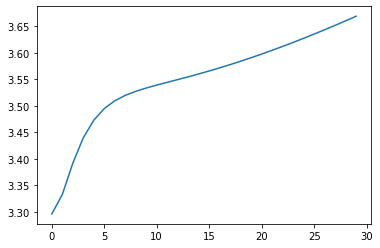

In [270]:
X=np.array([[1,2],[2,1],[4,3]])
y=np.array([2,3,1])
lr= LGR(alpha =0.1)
lr.fit(X,y)
import matplotlib.pyplot as plt
plt.plot(lr.ls)

In [274]:
beta = np.ones((2,3))
lr.prob(X, beta)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [275]:
lr.grad(X,y, beta)

array([[-5.55555556e-01,  4.44444444e-01,  1.11111111e-01],
       [-3.33333333e-01, -7.40148683e-17,  3.33333333e-01]])

In [276]:
lr.loss(X,y, beta)

3.295836866004329

In [277]:
lr.grad(X,y, beta)

array([[-5.55555556e-01,  4.44444444e-01,  1.11111111e-01],
       [-3.33333333e-01, -7.40148683e-17,  3.33333333e-01]])

In [320]:
np.sum(lr.grad(X,y, beta), axis=1)

array([-3.19189120e-16, -5.55111512e-17])

In [280]:
alpha =0.1
beta2 = beta - alpha * lr.grad(X, y, beta)
beta2

array([[1.05555556, 0.95555556, 0.98888889],
       [1.03333333, 1.        , 0.96666667]])

In [281]:
lr.loss(X, y, beta2)

3.33238400929644

In [294]:
(lr.loss(X,y, beta) - lr.loss(X, y, beta-0.1))/(beta-beta+0.1)

array([[4.4408921e-15, 4.4408921e-15, 4.4408921e-15],
       [4.4408921e-15, 4.4408921e-15, 4.4408921e-15]])

In [296]:
ymatrix = lr.get_ymatrix(y)
X.T.dot(ymatrix)

array([[4, 1, 2],
       [3, 2, 1]])

In [297]:
ymatrix

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [298]:
X.T

array([[1, 2, 4],
       [2, 1, 3]])

In [301]:
p

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [300]:
X.T.dot(ymatrix)

array([[4, 1, 2],
       [3, 2, 1]])

In [303]:
p-ymatrix

array([[ 0.33333333, -0.66666667,  0.33333333],
       [ 0.33333333,  0.33333333, -0.66666667],
       [-0.66666667,  0.33333333,  0.33333333]])

In [302]:
X.T.dot(p-ymatrix)

array([[-1.66666667e+00,  1.33333333e+00,  3.33333333e-01],
       [-1.00000000e+00, -2.22044605e-16,  1.00000000e+00]])

In [304]:
beta

array([[1., 1., 1.],
       [1., 1., 1.]])

In [313]:
X.T.dot(p-ymatrix)/3

array([[-5.55555556e-01,  4.44444444e-01,  1.11111111e-01],
       [-3.33333333e-01, -7.40148683e-17,  3.33333333e-01]])

In [316]:
beta1 = beta-0.001*X.T.dot(p-ymatrix)/3
beta1

array([[1.00055556, 0.99955556, 0.99988889],
       [1.00033333, 1.        , 0.99966667]])

In [317]:
lr.prob(X, beta1)

array([[0.33374086, 0.33318509, 0.33307405],
       [0.33381499, 0.33303699, 0.33314802],
       [0.33440827, 0.3327404 , 0.33285133]])

In [318]:
-np.sum(np.log(p)*ymatrix)

3.295836866004329

In [241]:
ymatrix = lr.get_ymatrix(y)
np.log(p)*ymatrix

array([[-0.        , -1.09861229, -0.        ],
       [-0.        , -0.        , -1.09861229],
       [-1.09861229, -0.        , -0.        ]])

In [244]:
np.sum(np.log(p)*ymatrix)

-3.295836866004329

In [246]:
X.T.dot(p-ymatrix)/X.shape[0]

array([[-5.55555556e-01,  4.44444444e-01,  1.11111111e-01],
       [-3.33333333e-01, -7.40148683e-17,  3.33333333e-01]])

In [250]:
X[1:2].T.dot(p[1:2]-ymatrix[1:2])

array([[ 0.66666667,  0.66666667, -1.33333333],
       [ 0.33333333,  0.33333333, -0.66666667]])

In [181]:
y_train_pred=lgr.predict(X_train)
print(y_train_pred)
print(confusion_matrix(y_train_pred, np.argmax(y_train, axis=1)))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 0 0 2 0 2 2 0 2 2 2
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0 0 0 2 2 0 0 2 0 2 2 2 2 0
 2 0 2 0 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 0 0 2 2 2 0]
[[34  0  0]
 [ 0  0  0]
 [ 0 32 39]]


In [188]:
accuracy_score(y_train_pred, np.argmax(y_train, axis=1))

0.6952380952380952

In [189]:
y_test_pred=lgr.predict(X_test)
print(accuracy_score(y_test_pred, np.argmax(y_test, axis=1)))
print(confusion_matrix(y_test_pred, np.argmax(y_test, axis=1)))

0.6
[[16  0  0]
 [ 0  0  0]
 [ 0 18 11]]


In [190]:
lgr.beta

array([[ 0.45900276,  0.33398702,  0.20701022],
       [ 0.64253059,  0.22240722,  0.13506219],
       [-0.12524695,  0.44285749,  0.68238946],
       [ 0.11744158,  0.34589918,  0.53665924]])

In [191]:
lgr.predict(X_test)

array([2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0], dtype=int32)

In [215]:
def size(r):
    return r*r*10
class Circle(object):
    def __init__(self, r=0):
        self.r=r
    def size(self, r):
        self.r = r
        return self.r*self.r*3.14
    def cal(self,):
        return self.size(4)
    
l = Circle(3)
l.cal()

50.24

In [216]:
l.size(4)

50.24